In [29]:
# import modules
import numpy as np
import astropy.units as u
from astropy.constants import G

# import plotting modules
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# my modules
from ReadFile import Read
from CenterOfMass2 import CenterOfMass

In [30]:
def OrbitCOM(galaxy, start, end, n):
    """function that loops over all the desired snapshots to compute the COM pos and vel as a function of time.
    inputs: galaxy -> (string) name of galaxy
            start -> (int) number of first snapshot to be read in
            end -> (int) number of last snapshot to be read in
            n -> (int) interval over which COM is returned
    outputs:
            fileout -> (file) saves time, COM position, and velocity vectors of 
                a given galaxy in each snapshot
    """
    
    # compose the filename for output
    fileout = "Orbit_" + galaxy + ".txt"
    
    #  set tolerance and VolDec for calculating COM_P in CenterOfMass
    delta = .1
    volDec = 2
    
    # for M33 that is stripped more, use different values for VolDec
    if galaxy == "M33":
        volDec = 4
    
    # generate the snapshot id sequence 
    snap_ids = np.arange(start, end + 1, n)
        #.arange is exclusive of final value, so we do end + 1

    if snap_ids.size == 0:
        print("No more snap_ids")
        return
        
    # initialize the array for orbital info: t, x, y, z, vx, vy, vz of COM
    orbit = np.zeros([(snap_ids.size), 7])
    
    # a for loop 
    # loop over files
    for i, snap_id in enumerate(snap_ids):
        #Defining filename -> :03 defines max length we want the 
        #name to be. "If input is not the same size, fill it with
        #0s until it's the same size"
        filename = f"VLowRes/{galaxy}/{galaxy}_{snap_id:03}.txt"

        # Initialize an instance of CenterOfMass class, using disk particles
        COM = CenterOfMass(filename, 2)
            #disk is ptype = 2

        #Storing time in Gyr
        orbit[i, 0] = (COM.time).to_value()/1000

        #Position
        posCOM = COM.COM_P(.1, volDec)
            #inputting delta and volDEC
        x, y, z = posCOM[0], posCOM[1], posCOM[2]
        orbit[i, 1] = x.value
        orbit[i, 2] = y.value
        orbit[i, 3] = z.value
        #Velocity
        velCOM = COM.COM_V(x, y, z)
        vx, vy, vz = velCOM[0], velCOM[1], velCOM[2]
        orbit[i, 4] = vx.value
        orbit[i, 5] = vy.value
        orbit[i, 6] = vz.value

        # Store the COM pos and vel. Remember that now COM_P required VolDec
        # store the time, pos, vel in ith element of the orbit array,  without units (.value) 
        # note that you can store 
        # a[i] = var1, *tuple(array1)
        # print snap_id to see the progress
        print(snap_id)
        
    # write the data to a file
    # we do this because we don't want to have to repeat this process 
    # this code should only have to be called once per galaxy.
    np.savetxt(fileout, orbit, fmt = "%11.3f"*7, comments='#',
               header="{:>10s}{:>11s}{:>11s}{:>11s}{:>11s}{:>11s}{:>11s}"\
                      .format('t', 'x', 'y', 'z', 'vx', 'vy', 'vz'))
    

In [31]:
#computing time, COM pos, and velocity vectors for each galaxy & generating 
#files to store these these over time
M31orbit = OrbitCOM('M31', 0, 800, 5)
M33orbit = OrbitCOM('M33', 0, 800, 5)
MWorbit = OrbitCOM('MW', 0, 800, 5)

0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
130
135
140
145
150
155
160
165
170
175
180
185
190
195
200
205
210
215
220
225
230
235
240
245
250
255
260
265
270
275
280
285
290
295
300
305
310
315
320
325
330
335
340
345
350
355
360
365
370
375
380
385
390
395
400
405
410
415
420
425
430
435
440
445
450
455
460
465
470
475
480
485
490
495
500
505
510
515
520
525
530
535
540
545
550
555
560
565
570
575
580
585
590
595
600
605
610
615
620
625
630
635
640
645
650
655
660
665
670
675
680
685
690
695
700
705
710
715
720
725
730
735
740
745
750
755
760
765
770
775
780
785
790
795
800
0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
130
135
140
145
150
155
160
165
170
175
180
185
190
195
200
205
210
215
220
225
230
235
240
245
250
255
260
265
270
275
280
285
290
295
300
305
310
315
320
325
330
335
340
345
350
355
360
365
370
375
380
385
390
395
400
405
410
415
420
425
430
435
440
445
450
455
460
465
470
475
480
485
490
495


In [32]:
# Read in the data files for the orbits of each galaxy that you just created
# headers:  t, x, y, z, vx, vy, vz
# using np.genfromtxt
M31outfile = 'Orbit_M31.txt'
M33outfile = 'Orbit_M33.txt'
MWoutfile = 'Orbit_MW.txt'

M31data = np.genfromtxt(M31outfile, dtype = None, names = True, skip_header = 0, usecols = (0,1,2,3,4,5,6))
M33data = np.genfromtxt(M33outfile, dtype = None, names = True, skip_header=0, usecols = (0,1,2,3,4,5,6))
MWdata = np.genfromtxt(MWoutfile, dtype = None, names = True, skip_header = 0, usecols = (0,1,2,3,4,5,6))

In [33]:
# function to compute the magnitude of the difference between two vectors 
# You can use this function to return both the relative position and relative velocity for two 
# galaxies over the entire orbit

#Create a function that computes the difference between two vectors and returns the
#magnitude of that vector.
def vecdifference(pos1, pos2, vel1, vel2):
    '''
    Function to compute the magnitude of the difference between two vectors
    Inputs: pos1, pos2 -> (arrays) position vectors of 2 different galaxies
            vel1, vel2 -> (arrays) velocity vectors of 2 different galaxies
    Outputs: pmag, vmag -> (floats) magnitudes of position, velocity differences
                                    between 2 galaxies
    '''
    px = pos2[0] - pos1[0]
    py = pos2[1] - pos1[1]
    pz = pos2[2] - pos1[2]
    pmag = np.sqrt(px**2 + py**2 + pz**2) #magnitude of relative position difference
    
    vx = vel2[0] - vel1[0]
    vy = vel2[1] - vel1[1]
    vz = vel2[2] - vel1[2]
    vmag = np.sqrt(vx**2 + vy**2 + vz**2) #magnitude of relative velocity difference

    return pmag, vmag

In [34]:
'''
Use this function to compute the magnitude of the relative
separation and velocity of : 1) MW and M31; and 2) M33 and M31.
'''

#Initializing lists for mag of relative separation
sepW_31 = [] #MW to M31
sep33_31 = [] #M33 to M31
#Initializing lists for mag of relative velocity
velW_31 = [] #MW to M31
vel33_31 = [] #M33 to M31
#Need lists in order for time and relative magnitudes to have same dimension

#Creating a for-loop to go through data, across the given range of snap_ids
#Using M31 arbitrarily, all 3 will have same len()
for i in range(len(M33data)):
    #Defining pos & vel for M31
    #Position
    M31x = M31data[i][1]
    M31y = M31data[i][2]
    M31z = M31data[i][3]
    M31pos = np.array([M31x, M31y, M31z])
    #Velocity
    M31vx = M31data[i][4]
    M31vy = M31data[i][5]
    M31vz = M31data[i][6]
    M31vel = np.array([M31vx, M31vy, M31vz])
    
    #Defining pos & vel for M33
    #Position
    M33x = M33data[i][1]
    M33y = M33data[i][2]
    M33z = M33data[i][3]
    M33pos = np.array([M33x, M33y, M33z])
    #Velocity
    M33vx = M33data[i][4]
    M33vy = M33data[i][5]
    M33vz = M33data[i][6]
    M33vel = np.array([M33vx, M33vy, M33vz])
    
    #Defining pos & vel for MW
    #Position
    MWx = MWdata[i][1]
    MWy = MWdata[i][2]
    MWz = MWdata[i][3]
    MWpos = np.array([MWx, MWy, MWz])
    #Velocity
    MWvx = MWdata[i][4]
    MWvy = MWdata[i][5]
    MWvz = MWdata[i][6]
    MWvel = np.array([MWvx, MWvy, MWvz])

    posW31, velW31 = vecdifference(MWpos, M31pos, MWvel, M31vel)
    #pos & velW31 are 1D, can't graph against time (>>1D)
    sepW_31.append(posW31)
    velW_31.append(velW31)
    #Appending each entry to our lists
    
    pos3331, vel3331 = vecdifference(M33pos, M31pos, M33vel, M31vel)
    sep33_31.append(pos3331)
    vel33_31.append(vel3331)
    #Appending each entry to our lists

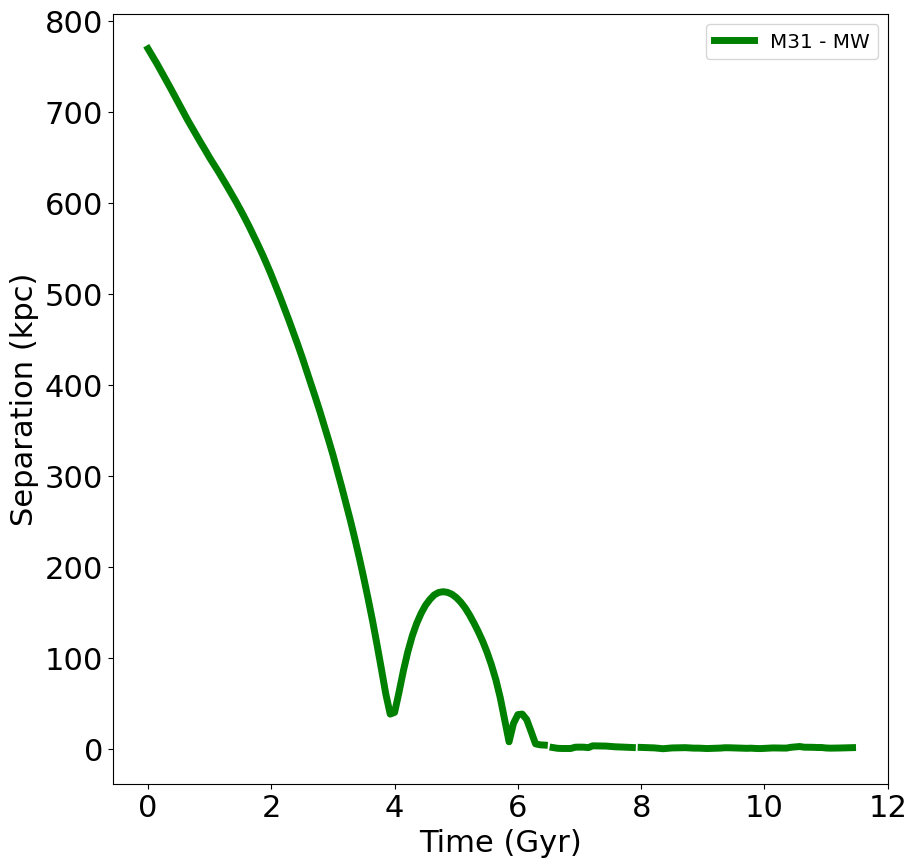

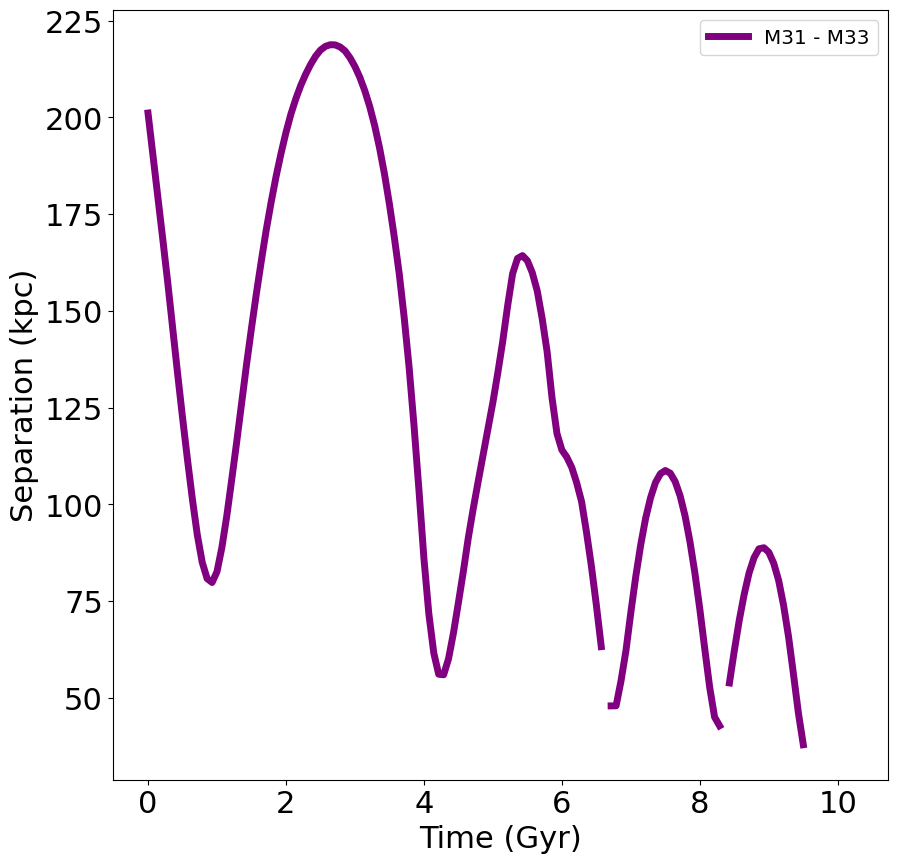

In [35]:
# Plot the Orbit of the galaxies 
#################################

time = np.genfromtxt(M33outfile, dtype = None, names = True, skip_header = 0, usecols = 0)
#pulling time (column 0) from the output file
    #Using M31, but they'll all cover same time range so could be any outfile

#MW and M31
fig = plt.figure(figsize = (10,10))  # sets the scale of the figure
ax = plt.subplot(111)
plt.plot(time, sepW_31, color = 'green', linewidth = 5, label = 'M31 - MW')
plt.xlabel('Time (Gyr)', fontsize=22)
plt.ylabel('Separation (kpc)', fontsize=22)
    #adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size
legend = ax.legend(loc = 'upper right', fontsize = 'x-large')
plt.show()

#M33 and M31
fig = plt.figure(figsize = (10,10))  # sets the scale of the figure
ax = plt.subplot(111)
plt.plot(time, sep33_31, color = 'purple', linewidth = 5, label = 'M31 - M33')
plt.xlabel('Time (Gyr)', fontsize=22)
plt.ylabel('Separation (kpc)', fontsize=22)
    #adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size
legend = ax.legend(loc = 'upper right', fontsize = 'x-large')
plt.show()

# Save to a file

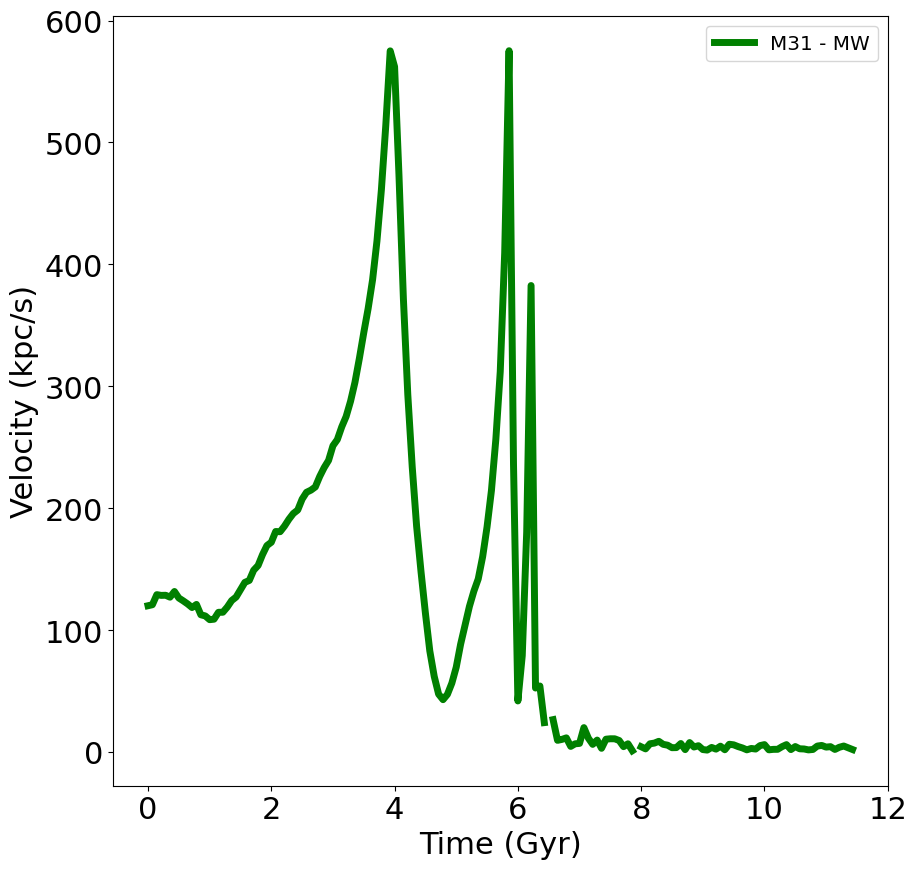

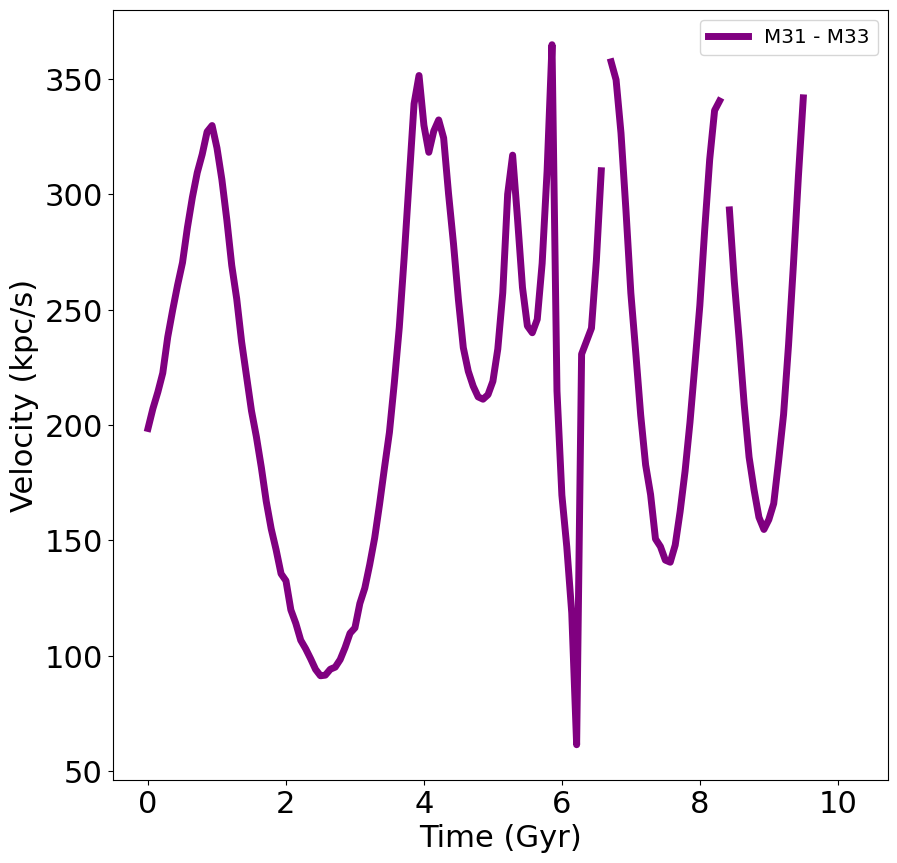

In [36]:
# Plot the orbital velocities of the galaxies 
#################################

#MW and M31
fig = plt.figure(figsize = (10,10))  # sets the scale of the figure
ax = plt.subplot(111)
plt.plot(time, velW_31, color = 'green', linewidth = 5, label = 'M31 - MW')
plt.xlabel('Time (Gyr)', fontsize=22)
plt.ylabel('Velocity (kpc/s)', fontsize=22)
    #adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size
legend = ax.legend(loc = 'upper right', fontsize = 'x-large')
plt.show()

#M33 and M31
fig = plt.figure(figsize = (10,10))  # sets the scale of the figure
ax = plt.subplot(111)
plt.plot(time, vel33_31, color = 'purple', linewidth = 5, label = 'M31 - M33')
plt.xlabel('Time (Gyr)', fontsize=22)
plt.ylabel('Velocity (kpc/s)', fontsize=22)
    #adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size
legend = ax.legend(loc = 'upper right', fontsize = 'x-large')
plt.show()

1. How many close encounters will the MW and M31 experience in the future?

   3! 2 big bumps with a final sustained encounter (merger).

2. How is the time evolution of the separation and relative velocity related?

    They are inversely related. Peaks in separation correspond to troughs in velocity, and vice versa. 

3. When do M31 and the MW merge? (you might need to zoom in on the plot - try a log y axis). What happens to M33’s orbit when they merge?

   Around 6.5Gyr. M33's orbit has a close encounter with the merging M31/MW as the merge is happening. Separation then increases, and it has 2 more close encounters in the next 4Gyr.

4. BONUS: what is roughly the decay rate of M33’s orbit after 6 Gyr (ratio of the differ- ence between two successive apocenters and the orbital period; you don’t need to be precise). If this rate is constant, how long will it take M33 to merge with the combined MW+M31 remnant if it is at a distance of 75 kpc?

   ~-7kpc/Gyr! If this rate is constant, it will take ~10Gyr to merge with MW/M31 remnant. 